In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [3]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

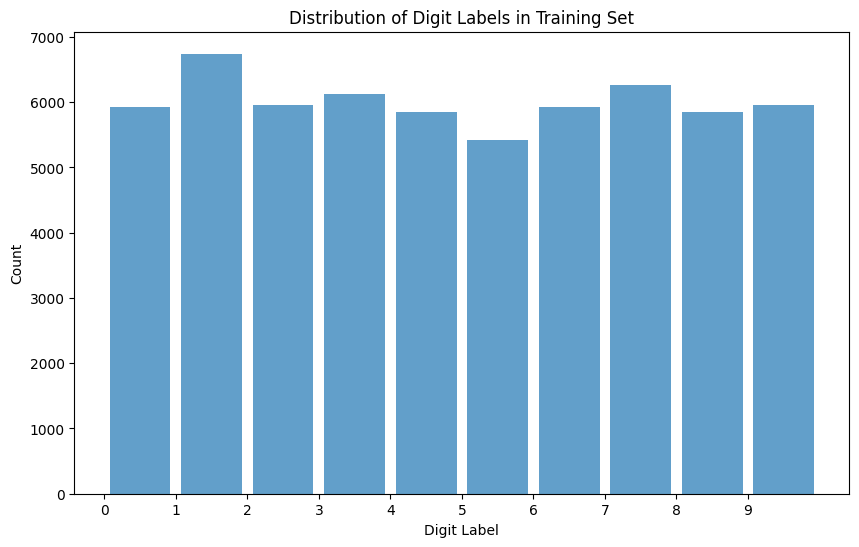

In [5]:
plt.figure(figsize=(10,6))
plt.hist(np.argmax(y_train, axis=1), bins=range(11), alpha=0.7, rwidth=0.85)
plt.xticks(range(10))
plt.title('Distribution of Digit Labels in Training Set')
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.show()

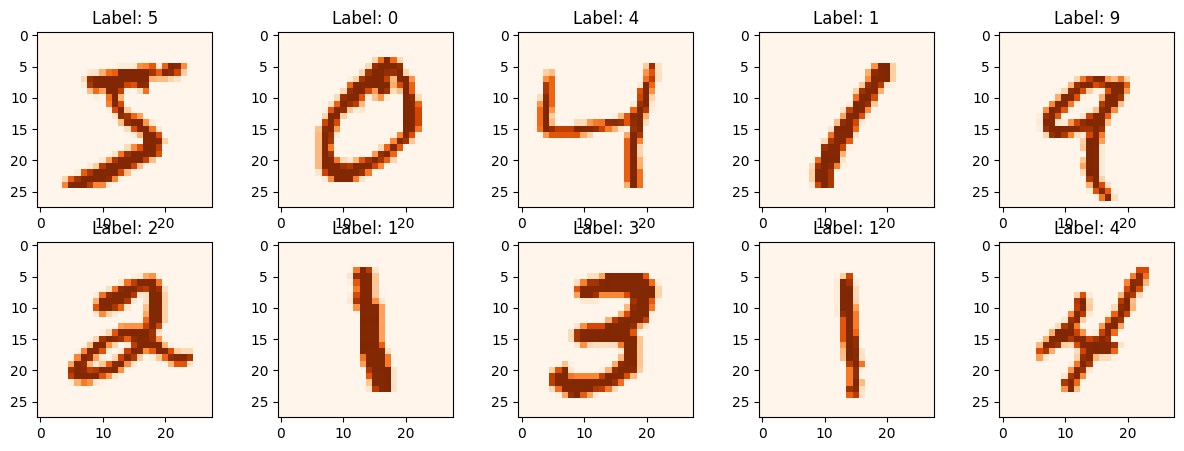

In [16]:
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='Oranges')
    plt.title(f"Label: {np.argmax(y_train[i])}")
plt.show()

In [19]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 3.7706 - accuracy: 0.8369 - val_loss: 0.9352 - val_accuracy: 0.9044
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.6544 - accuracy: 0.9154 - val_loss: 0.6664 - val_accuracy: 0.9118
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3705 - accuracy: 0.9350 - val_loss: 0.4374 - val_accuracy: 0.9283
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2569 - accuracy: 0.9470 - val_loss: 0.3596 - val_accuracy: 0.9366
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1899 - accuracy: 0.9560 - val_loss: 0.4020 - val_accuracy: 0.9325
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1550 - accuracy: 0.9625 - val_loss: 0.3367 - val_accuracy: 0.9446
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1311 - accuracy: 0.9660 - val_loss: 0.3415 - val_accuracy: 0.9438
Epoc

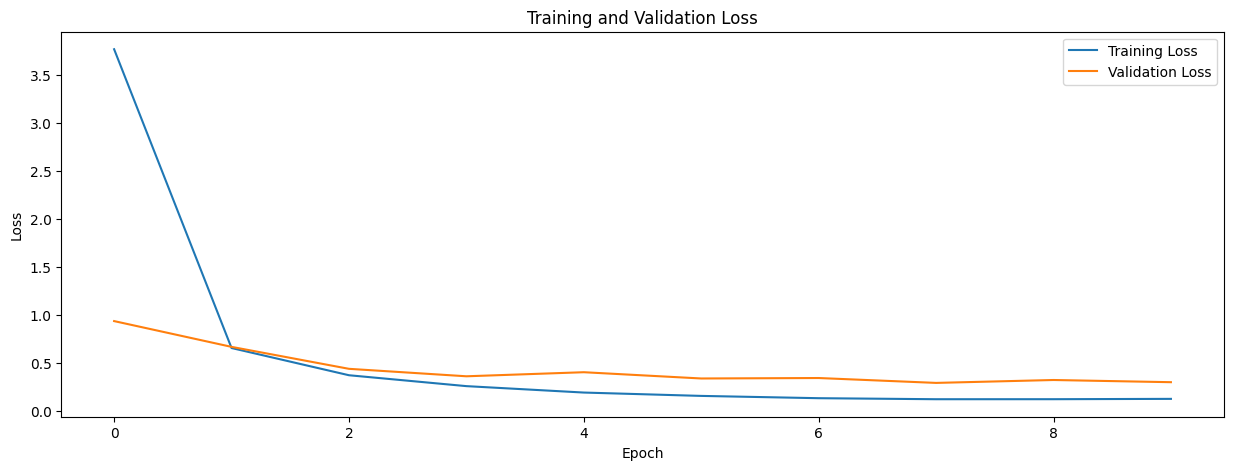

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

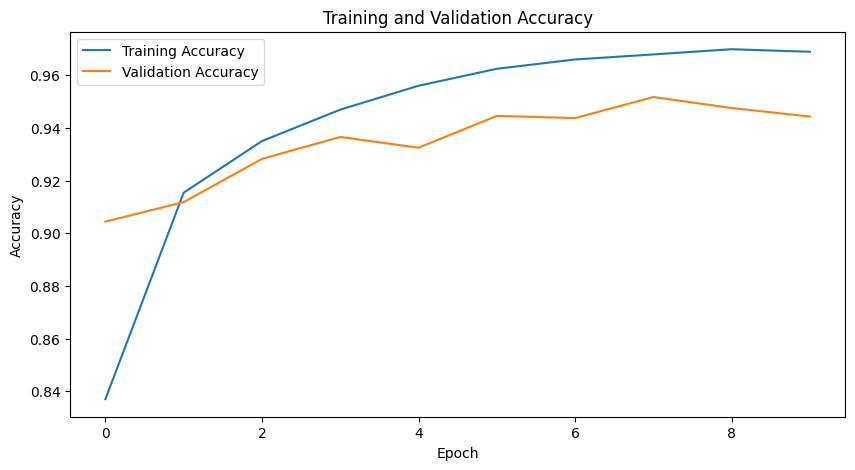

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.9421
Test accuracy: 94.21%
313/313 [==============================] - 1s 2ms/step


In [25]:
def recognize_digit(image):
    prediction = model.predict(image.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)
    return predicted_label

In [27]:
sample_index = 0
predicted_digit = recognize_digit(X_test[sample_index])
actual_digit = np.argmax(y_test[sample_index])

1/1 [==============================] - 0s 53ms/step


In [28]:
print(f"Predicted Digit: {predicted_digit}")
print(f"Actual Digit: {actual_digit}")

Predicted Digit: 7
Actual Digit: 7
